In [1]:
from tensorflow.keras import layers
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')
y_train = np.load('y_train.npy')

In [4]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

In [5]:
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape = (28, 28, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(33, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [6]:
history = model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_val, y_val))
score = model.evaluate(X_test, y_test)
print(f'Accuracy: {score[1]}')
model.save('model.h5')

Epoch 1/5
297/297 [==============================] - 7s 20ms/step - loss: 0.9236 - accuracy: 0.7544 - val_loss: 0.1472 - val_accuracy: 0.9566
Epoch 2/5
297/297 [==============================] - 6s 19ms/step - loss: 0.0581 - accuracy: 0.9858 - val_loss: 0.0234 - val_accuracy: 0.9940
Epoch 3/5
297/297 [==============================] - 5s 18ms/step - loss: 0.0282 - accuracy: 0.9935 - val_loss: 0.0147 - val_accuracy: 0.9984
Epoch 4/5
297/297 [==============================] - 6s 19ms/step - loss: 0.0063 - accuracy: 0.9991 - val_loss: 0.0031 - val_accuracy: 0.9997
Epoch 5/5
132/132 [==============================] - 1s 7ms/step - loss: 0.0019 - accuracy: 0.9998
Accuracy: 0.9997631311416626


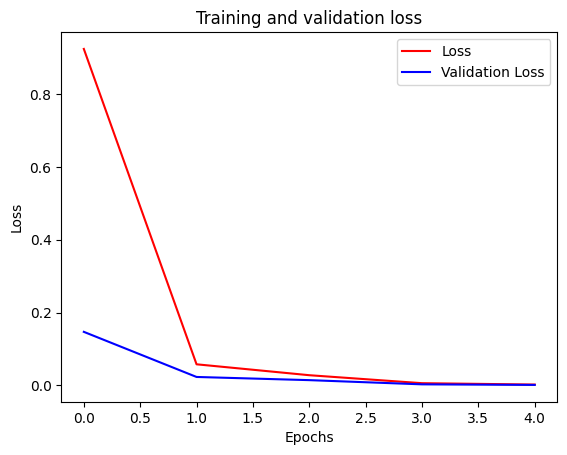

In [7]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs =[i for i in range(5)]
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])
plt.show()

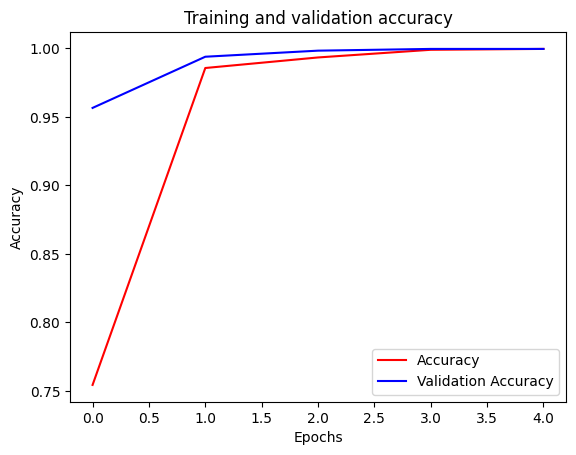

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()